https://www.youtube.com/watch?v=iNlZ3IU5Ffw

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("university_records - Copy.csv")

df = df.drop(columns=['newMark'])

df.head()

,y,new_t,payment,AlphaMax
0,1,0,5,1
1,1,0,6,1
2,1,0,7,1
3,1,0,8,1
4,1,0,3,2


In [3]:
df.describe()

,y,new_t,payment,AlphaMax
count,91.0,91.000000,91.000000,91.000000
mean,1.0,2.274725,3.450549,3.219780
std,0.0,1.844306,1.634787,1.323314
min,1.0,0.000000,1.000000,1.000000
25%,1.0,1.000000,2.000000,2.000000
50%,1.0,2.000000,3.000000,3.000000
75%,1.0,4.000000,4.500000,4.000000
max,1.0,7.000000,8.000000,5.000000


In [4]:
scaler = StandardScaler()

In [5]:
df[['y_T', 'AlphaMax_T', 'new_t_T', 'payment_T']] = scaler.fit_transform(df[['y', 'AlphaMax', 'new_t', 'payment']])

In [6]:
df

,y,new_t,payment,AlphaMax,y_T,AlphaMax_T,new_t_T,payment_T
0,1,0,5,1,0.0,-1.686734,-1.240210,0.953051
1,1,0,6,1,0.0,-1.686734,-1.240210,1.568140
2,1,0,7,1,0.0,-1.686734,-1.240210,2.183230
3,1,0,8,1,0.0,-1.686734,-1.240210,2.798320
4,1,0,3,2,0.0,-0.926868,-1.240210,-0.277128
...,...,...,...,...,...,...,...,...
86,1,6,2,3,0.0,-0.167003,2.031069,-0.892218
87,1,6,2,4,0.0,0.592862,2.031069,-0.892218
88,1,6,1,5,0.0,1.352727,2.031069,-1.507307
89,1,6,2,5,0.0,1.352727,2.031069,-0.892218


In [7]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1 , max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    fig = plt.subplots(figsize=(5, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('number of clusters')
    plt.ylabel('inertia')
    plt.grid(True)
    plt.show()
                

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


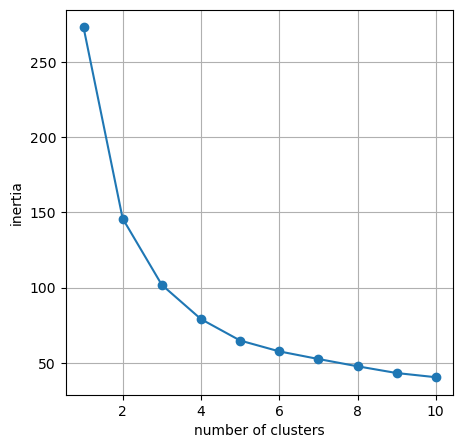

In [8]:
optimise_k_means(df[['y_T', 'AlphaMax_T', 'new_t_T', 'payment_T']], 11)

In [9]:
kmeans = KMeans(n_clusters = 4)

In [10]:
kmeans.fit(df[['y_T', 'AlphaMax_T', 'new_t_T', 'payment_T']])

KMeans(n_clusters=4)

In [11]:
df['kmeans_4'] = kmeans.labels_

In [12]:
df

,y,new_t,payment,AlphaMax,y_T,AlphaMax_T,new_t_T,payment_T,kmeans_4
0,1,0,5,1,0.0,-1.686734,-1.240210,0.953051,2
1,1,0,6,1,0.0,-1.686734,-1.240210,1.568140,2
2,1,0,7,1,0.0,-1.686734,-1.240210,2.183230,2
3,1,0,8,1,0.0,-1.686734,-1.240210,2.798320,2
4,1,0,3,2,0.0,-0.926868,-1.240210,-0.277128,3
...,...,...,...,...,...,...,...,...,...
86,1,6,2,3,0.0,-0.167003,2.031069,-0.892218,1
87,1,6,2,4,0.0,0.592862,2.031069,-0.892218,1
88,1,6,1,5,0.0,1.352727,2.031069,-1.507307,1
89,1,6,2,5,0.0,1.352727,2.031069,-0.892218,1


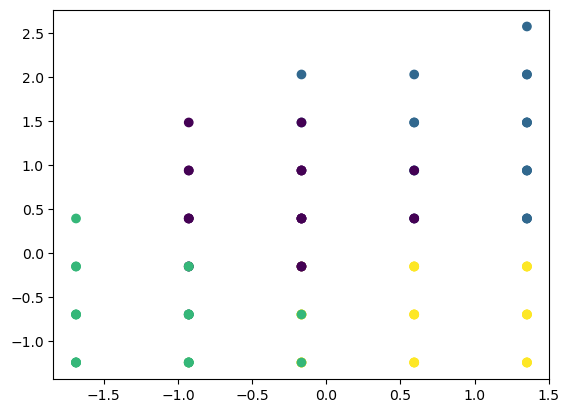

[[1.         2.73913043 3.13043478 3.52173913]
 [1.         4.5        4.65       2.        ]
 [1.         1.63636364 0.86363636 5.68181818]
 [1.         4.         0.88461538 2.61538462]]


In [13]:
plt.scatter(x=df['AlphaMax_T'], y=df['new_t_T'],  c=df['kmeans_4'])


plt.show()
inversed = scaler.inverse_transform(kmeans.cluster_centers_)
print(inversed)


In [25]:
kmeans.predict(scaler.transform([[1 , 4 , 0 , 2]]))

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([3])

In [62]:
import numpy as np

def test(a,b):
    return np.linalg.norm(np.array(a)-np.array(b))

In [63]:
a = [0.58 , 5 , 4 , 2]

In [64]:
test(a,scaler.inverse_transform(kmeans.cluster_centers_)[0] ) 

2.5705221862530006

In [65]:
test(a,scaler.inverse_transform(kmeans.cluster_centers_)[1] ) 

3.3283147128805766

In [66]:
test(a,scaler.inverse_transform(kmeans.cluster_centers_)[2] ) 

4.757639511475038

In [67]:
test(a,scaler.inverse_transform(kmeans.cluster_centers_)[3] ) 

5.503946821349648

In [68]:
test(a,scaler.inverse_transform(kmeans.cluster_centers_)[4] ) 

2.864381367470389

In [69]:
test(a,scaler.inverse_transform(kmeans.cluster_centers_)[5] ) 

1.0871107524840995

In [38]:
kmeans.predict(df[['y_T', 'AlphaMax_T', 'new_t_T', 'payment_T']])

array([3, 3, 3, 3, 5, 5, 5, 4, 3, 3, 3, 5, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       5, 5, 5, 5, 1, 1, 1, 5, 5, 5, 5, 1, 5, 1, 3, 3, 3, 3, 5, 5, 5, 5,
       3, 3, 5, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 1, 1, 1, 5, 5, 5,
       1, 1, 1, 1, 3, 3, 3, 3, 3, 5, 5, 3, 5, 3, 5, 5, 4, 4, 4, 4, 4, 4,
       4, 1, 5, 5, 5, 5, 1, 1, 1, 5, 5, 5, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3,
       3, 1, 1, 3, 4, 4, 4, 4, 4, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2])

In [39]:
dict_tmp={}

In [50]:
np.mean(df[df['kmeans_6']==5])

y             0.802703
AlphaMax      4.486486
new_t         4.270270
payment       2.891892
y_T           1.067936
AlphaMax_T    0.588662
new_t_T       0.909691
payment_T     0.162644
kmeans_6      5.000000
dtype: float64

In [122]:
np.std(df[df['kmeans_10']==9])

y             0.079575
AlphaMax      0.948957
new_t         0.922611
payment       0.739985
y_T           0.327969
AlphaMax_T    0.454130
new_t_T       0.434129
payment_T     0.459621
kmeans_6      0.543123
kmeans_10     0.000000
dtype: float64

In [ ]:
for k in range(1 , 7):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df[['y_T', 'AlphaMax_T', 'new_t_T', 'payment_T']])
    df[f'KMeans_{k}'] = kmeans.labels_

In [ ]:
df

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(20,5))

for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(x=df['y'], y=df['t'],   c=df[f'KMeans_{i}'])
    ax.set_title(f'N Clusters: {i}')